# Leetcode 997: Find the Town Judge

## Background
LeetCode has a [curated library of 45 graph problems](https://leetcode.com/studyplan/graph-theory/) that cover eight graph topics including `graph theory`, `Dijkstra's (pathfinding)`, and `traversals` among others. 

This is my first notebook in a series where I will dig into these problems and go beyond just the code to explore the theory and practical applications as well. I will use Google Gemini as a learning and development assistant.

## Problem
In this notebook we will analyze [LeetCode 997: Find the Town Judge](https://leetcode.com/problems/find-the-town-judge/description/?envType=study-plan-v2&envId=graph-theory). 

 This problem is classified by LeetCode as:
* Topic: Graph Theory
* Difficulty: Easy
* Tags: Graph, Array, Hash Table

In addition to developing solution code, we will use Google Gemini to help us:
* Understand the problem, including the graph theory concepts involved 
* Visualize the data in a graph-native way
* Develop an approach to solve the problem
* Develop one or more code solutions
* Incorporate unit tests with additional data 


## Instantiate Gemini using the Gemini API
While we could use an orchestration library like LangChain, Google has done a very good job with the [Gemini API](https://ai.google.dev/gemini-api/docs/api-overview). Anecdotally, I have also seen several customers moving away from open sorce orchestration layers like LangChain for a variety of reasons. 

There is no right or wrong answer here, but I will use the Gemini API in this notebook as a learning exercise. 

In [6]:
# !pip install python-dotenv --upgrade --quiet
from dotenv import load_dotenv
import os

# !pip install tqdm --upgrade --quiet
import tqdm as notebook_tqdm

# !pip install -U -q google.generativeai
import google.generativeai as genai

In [7]:
# read API key from local .env 
load_dotenv()
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

In [8]:
# # instantiate the LLM 
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])
model = genai.GenerativeModel('gemini-1.5-pro-latest')


In [9]:
# to print markdown code 
from IPython.display import display, Markdown

def print_md(string):
    display(Markdown(string))

In [13]:
# test model with a simple prompt
test_prompt = ''' 
What is graph theory and why is it important for me to know
as a data scientist? Provide a concise summary.
'''

test_response = model.generate_content(test_prompt)
print_md(test_response.text)

## Graph Theory: A Data Scientist's Powerful Tool

Graph theory is a branch of mathematics that studies **relationships** between objects. These objects, called **nodes** or **vertices**, are connected by **edges** which represent the relationships between them. Think of it like a social network, where people are nodes and friendships are edges.

**Why is it important for data science?**

*   **Modeling complex relationships:**  Real-world data often involves intricate connections, like social networks, recommendation systems, fraud detection, and protein interactions. Graph theory provides the tools to represent and analyze these relationships effectively. 
*   **Powerful algorithms:**  Algorithms like PageRank (used by Google Search) and community detection help analyze graphs to uncover hidden patterns, identify influential nodes, and make predictions.
*   **Visualization:**  Graphs offer a clear visual representation of complex data, making it easier to understand and communicate insights.

**Examples of graph theory in data science:**

*   **Recommendation systems:**  Connecting users and products based on preferences and purchase history.
*   **Fraud detection:**  Identifying suspicious patterns of transactions between accounts.
*   **Social network analysis:**  Understanding influence, community structures, and information diffusion.
*   **Biological networks:**  Analyzing interactions between genes or proteins to understand biological processes.

**By understanding graph theory, you gain a valuable tool for modeling, analyzing, and visualizing complex relationships in your data, opening doors to new insights and powerful applications.** 


## LeetCode Problem Overview
First we will ask Gemini to provide an overview of LeetCode 997: Find the Town Judge, but with a focus on identifying and explaining the graph theory concepts involved. 

In [33]:
# instantiate Gemini for multi-turn chat with an empty history
chat = model.start_chat(history=[])

In [34]:
problem_prompt = '''
You are a helpful assistant who is an expert in graph theory, graph algorithms and 
LeetCode problems. 

First, provide an overview of LeetCode problem 997: Find the Town Judge.

Next, classify the domain of this problem (e.g., social network, recommendation system, etc.)
and provide an explanation. 

Finally, identify and describe each graph theory concept the problem and solution address.
For each graph theory concept, provide a detailed explanation of that concept and how 
it relates to this problem. Describe the practical applications of these graph theory
concepts. 

Do not provide a solution to the problem at this time. We will do that later.
'''

problem_response = chat.send_message(problem_prompt)

print_md(problem_response.text)

## LeetCode Problem 997: Find the Town Judge - An Overview

This problem presents a scenario within a town of *n* people (numbered 1 to *n*) where the town judge is someone trusted by everyone and who trusts nobody. You are given an array `trust` containing information about who trusts whom. Each element in `trust` is a pair `[a, b]` signifying that person *a* trusts person *b*. The task is to identify the town judge based on this information or determine that no judge exists.

## Domain Classification: Trust Networks and Social Structures 

This problem falls under the domain of **trust networks** which are a type of social structure represented as a directed graph. Nodes represent individuals and directed edges represent trust relationships between them. Trust networks are relevant in various fields:

* **Social Sciences:** Analyzing relationships and information flow in communities.
* **Recommendation Systems:** Building trust-based recommendations for products or services. 
* **Security and Fraud Detection:** Identifying suspicious activities based on anomalous trust patterns. 

## Graph Theory Concepts in Problem 997:

Several key graph theory concepts are relevant to understanding and solving this problem:

**1. Directed Graphs:**

* A directed graph is a set of nodes (vertices) connected by directed edges (arcs). The direction of an edge indicates the relationship between two nodes. In problem 997, the nodes represent people in the town, and a directed edge from *a* to *b* signifies that *a* trusts *b*.

**2. In-degree and Out-degree:**

* The in-degree of a node is the number of edges directed towards it. In this context, it represents the number of people who trust a specific person.
* The out-degree of a node is the number of edges directed outwards from it. Here, it signifies the number of people a specific person trusts. 
* The town judge, by definition, should have an in-degree of *n-1* (trusted by everyone except themself) and an out-degree of 0 (trusts nobody).

**3. Source and Sink Nodes:**

* A source node is a node with an out-degree greater than 0 and an in-degree of 0. In this problem, source nodes represent people who trust others but are not trusted by anyone.
* A sink node is a node with an in-degree greater than 0 and an out-degree of 0. The town judge, if it exists, would be a sink node.

**Practical Applications of these Concepts:**

* **Social Network Analysis:** Identifying influential individuals or communities within a network based on their in-degree and out-degree.
* **Web Search Algorithms:** Ranking web pages based on the number of incoming links (in-degree), which can indicate the page's authority and relevance.
* **Epidemiology:** Modeling the spread of diseases through contact networks, where the direction of edges represents the potential for disease transmission.

Understanding these graph theory concepts is crucial for efficiently analyzing the trust relationships in the town and identifying the judge, if one exists. 


## Data Set

In [36]:
data_prompt = '''
Now I want you to generate an accurate data set that 
I can use to understand and practice solving the problem.

Return the data and variables that I will need along with 
and explanation of both, in the context of the problem. 

Include the accurate solution for the generated data set as well.

Make sure the data set has a town judge and includes five to ten people.

The data set must also meet the following criteria from the problem:
1. The town judge trusts nobody.
2. Everybody (except for the town judge) trusts the town judge.
3. There is exactly one person that satisfies properties 1 and 2.
4. Every person must have at least one trust relationsip in the array
of trust relationships.
'''

data_response = chat.send_message(data_prompt)

print_md(data_response.text)

## Sample Data Set for Problem 997:

```python
n = 7  # Number of people in the town
trust = [[1, 4], [2, 4], [3, 4], [5, 4], [6, 4], [7, 4], [5, 7], [6, 7]]
```

**Explanation of Variables:**

* `n`: This variable represents the total number of people in the town, numbered from 1 to *n*. In this case, there are 7 people.
* `trust`: This is a list of pairs, where each pair `[a, b]` indicates that person *a* trusts person *b*.

**Interpretation of the Data Set:**

* Person 1, 2, 3, 5, and 6 trust person 4.
* Person 5 and 6 also trust person 7.

**Solution: The Town Judge is Person 4**

* Person 4 is trusted by everyone else (persons 1, 2, 3, 5, and 6) and trusts nobody, fulfilling the conditions for being the town judge.

**Verification of Criteria:**

1. **The town judge trusts nobody:** Person 4 has no outgoing trust relationships in the `trust` list.
2. **Everybody (except for the town judge) trusts the town judge:** All other people (1, 2, 3, 5, and 6) have trust relationships directed towards person 4.
3. **There is exactly one person that satisfies properties 1 and 2:** No other person in the town meets both conditions. 
4. **Every person must have at least one trust relationship in the array of trust relationships:** Each person in the town appears at least once in the `trust` list, indicating they either trust someone or are trusted by someone. 


In [37]:
# extract variable, data, and solution 
n = 7  # Number of people in the town
trust = [[1, 4], [2, 4], [3, 4], [5, 4], [6, 4], [7, 4], [5, 7], [6, 7]]
judge = 4

## Data Visualization

In [38]:
dataViz_prompt = '''
I want you to help me generate Python code to visualize the 
trust data set as a directed graph in a Jupyter notebook.

Include formatting so that the town judge is a different color in the graph
and the overall visualization is visually appealing. Also use the common syntax 
of G to represent the Network X graph object.
'''

dataViz_response = chat.send_message(dataViz_prompt)

print_md(dataViz_response.text)

## Visualizing the Trust Network with NetworkX

```python
import networkx as nx
import matplotlib.pyplot as plt

# Sample Data (Use your own data here)
n = 7
trust = [[1, 4], [2, 4], [3, 4], [5, 4], [6, 4], [5, 7], [6, 7]]

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, n + 1))  # Add nodes for each person
G.add_edges_from(trust)  # Add trust relationships as edges

# Identify the town judge (assuming you have already computed it)
town_judge = 4 

# Node positions for better visualization
pos = nx.circular_layout(G)

# Highlight the town judge node
node_colors = ['lightblue' if node == town_judge else 'pink' for node in G.nodes()]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for u, v, d in G.edges(data=True)})
plt.title("Visualization of Trust Network")
plt.show()
```

**Explanation:**

1. **Import Libraries:** We import `networkx` for graph manipulation and `matplotlib.pyplot` for visualization.
2. **Create Graph:** We initialize a directed graph `G` using `nx.DiGraph()`. Then, we add nodes for each person in the town and edges based on the `trust` relationships. 
3. **Identify Judge Node:**  Replace `town_judge = 4` with your logic to determine the judge.
4. **Node Positions:** `nx.circular_layout(G)` arranges nodes in a circular fashion for better visualization.
5. **Highlight Judge:** We create a list `node_colors` to assign colors. The judge node will be 'lightblue', and others will be 'pink'.
6. **Draw Graph:** 
    * `nx.draw` function draws the graph with labels, specified node colors and sizes.
    * `nx.draw_networkx_edge_labels` adds labels to the edges for clarity.
7. **Title and Display:** We set a title for the plot and use `plt.show()` to display the visualization. 

**Remember to replace the sample data and town judge identification with your actual data and solution.** 


In [39]:
# !pip install networkx --upgrade --quiet
# !pip install matplotlib --upgrade --quiet

import networkx as nx
import matplotlib.pyplot as plt

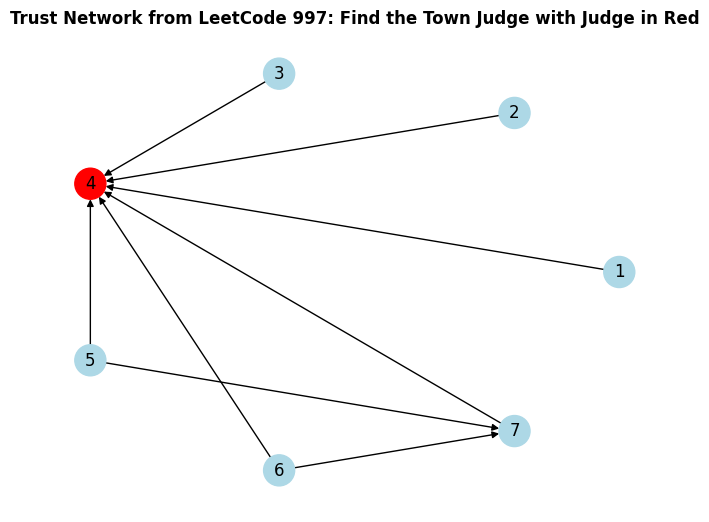

In [45]:
# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, n + 1))  # Add nodes for each person
G.add_edges_from(trust)  # Add trust relationships as edges


# Node positions for better visualization
pos = nx.circular_layout(G)

# Highlight the town judge node
node_colors = ['red' if node == judge else 'lightblue' for node in G.nodes()]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500)

# Set title and display the plot
plt.title("Trust Network from LeetCode 997: Find the Town Judge with Judge in Red",
          fontweight='bold')
plt.show()

In [46]:
# save image locally 
plt.savefig('leetcode997_trust_network.png')

<Figure size 640x480 with 0 Axes>

## Solution Code

In [47]:
solution_prompt = '''
Now I want to begin developing a solution the problem.
As a helpful coding assistant, explain the conceptual approaches. 
Include an analysis of complexity and runtime for each approach. 
Do not provide code yet, only the conceptual steps and evaluation.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)


## Conceptual Approaches to Finding the Town Judge:

Here are two main conceptual approaches to solve Problem 997, along with their complexity analysis:

**Approach 1: Counting Trust Relationships (In-degrees and Out-degrees)**

1. **Initialize Data Structures:** Create two dictionaries or lists to store the in-degree and out-degree for each person in the town. Initialize all values to 0.
2. **Process Trust Relationships:** Iterate through the `trust` list. For each pair `[a, b]`, increment the out-degree of person *a* and the in-degree of person *b*.
3. **Identify the Judge:** Iterate through the people in the town (from 1 to *n*). For each person, check if their in-degree is *n-1* (trusted by everyone except themselves) and their out-degree is 0 (trusts nobody). If such a person is found, they are the judge. Otherwise, no judge exists. 

**Complexity Analysis:**

* **Time Complexity:** O(E + V), where E is the number of edges (trust relationships) and V is the number of vertices (people) in the graph. Processing the trust relationships and iterating through the people both take linear time.
* **Space Complexity:** O(V) to store the in-degree and out-degree for each person.

**Approach 2: Graph Traversal (Depth-First Search or Breadth-First Search)**

1. **Construct the Graph:** Build a directed graph from the `trust` information, representing people as nodes and trust relationships as edges.
2. **Choose a Starting Node:** Select an arbitrary person as the starting node.
3. **Perform Graph Traversal:** Use either Depth-First Search (DFS) or Breadth-First Search (BFS) to explore the graph.
4. **Check Judge Conditions:** For each visited node, check if it meets the conditions of the town judge (in-degree = *n-1*, out-degree = 0). If found, return the node as the judge.
5. **No Judge Found:** If the traversal completes without finding a suitable node, there is no judge in the town. 

**Complexity Analysis:**

* **Time Complexity:** O(V + E) for both DFS and BFS, as they visit each node and edge at most once in the worst case.
* **Space Complexity:** 
    * **DFS:** O(V) in the worst case for the recursion stack, where V is the number of people.
    * **BFS:** O(V) for the queue to store nodes to visit.


## Evaluation and Comparison:

Both approaches have the same time complexity of O(V + E). However, the first approach (counting trust relationships) is generally more efficient in practice due to its simpler implementation and lower constant factors. It avoids the overhead of building and traversing a graph explicitly.

The choice between the two approaches might depend on the specific problem context and whether you need to perform additional graph analysis beyond finding the judge. If you need to analyze other aspects of the trust network, building a graph using NetworkX could be beneficial. 


In [48]:
solution_prompt = '''
Let's walk through solving this problem by using a list
to track in-degrees and out-degrees. Walk me through the 
implementation steps using Python. I want to make sure I 
understand the code implementation for each step.
Use the variables specified in the Leetcode problem itself.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)

## Implementing Approach 1: Counting Trust Relationships

Here's a step-by-step breakdown of the Python code implementation using lists to track in-degrees and out-degrees:

```python
class Solution:
    def findJudge(self, n: int, trust: List[List[int]]) -> int:
        # 1. Initialize in-degrees and out-degrees
        in_degrees = [0] * (n + 1)  # Index 0 will not be used
        out_degrees = [0] * (n + 1) 

        # 2. Process trust relationships
        for a, b in trust:
            out_degrees[a] += 1  # Person a trusts someone
            in_degrees[b] += 1   # Person b is trusted by a

        # 3. Identify the judge
        for i in range(1, n + 1):
            if in_degrees[i] == n - 1 and out_degrees[i] == 0:
                return i  # Found the judge!

        return -1  # No judge found
```

**Explanation:**

1. **Initialize Data Structures:**
    * We create two lists, `in_degrees` and `out_degrees`, both of size `n + 1`. 
    * The index 0 is not used (since people are numbered from 1 to *n*), so it simplifies indexing.
    * All values are initialized to 0, representing that initially, nobody trusts or is trusted by anyone. 

2. **Process Trust Relationships:**
    * We iterate through each pair `[a, b]` in the `trust` list.
    * For each pair:
        * We increment `out_degrees[a]` because person *a* trusts someone (*b*).
        * We increment `in_degrees[b]` because person *b* is trusted by someone (*a*).

3. **Identify the Judge:**
    * We iterate through each person `i` (from 1 to *n*) in the town.
    * For each person, we check if they meet the conditions of the judge:
        * If `in_degrees[i]` is equal to `n - 1` (meaning everyone except themselves trusts them) 
        * AND `out_degrees[i]` is equal to 0 (meaning they trust nobody), then we have found the judge and return their number `i`. 
    * If the loop completes without finding a suitable judge, we return -1 to indicate that no judge exists. 


In [52]:
# import typing for type hints
from typing import List

class Solution:
    def findJudge(self, n: int, trust: List[List[int]]) -> int:
        '''
        n: int - number of people in the town
        trust: List[List[int]] - list of trust relationships
        '''

        # 1. Initialize in-degrees and out-degrees
        in_degrees = [0] * (n + 1)  # Index 0 will not be used
        out_degrees = [0] * (n + 1) 

        # 2. Process trust relationships
        for a, b in trust:
            out_degrees[a] += 1  # Person a trusts someone
            in_degrees[b] += 1   # Person b is trusted by a

        # 3. Identify the judge
        for i in range(1, n + 1):
            if in_degrees[i] == n - 1 and out_degrees[i] == 0:
                return i  # Found the judge!

        return -1  # No judge found

## Test Solution on Initial Data

In [53]:
# instantiate solution
sol = Solution()

# run function 
answer = sol.findJudge(n, trust)

# confirm result 
print('Correct answer:', judge)
print('Function response:', answer)
assert judge == answer

Correct answer: 4
Function response: 4


## Create Unit Tests
Next we will use Gemini to help us develop some unit tests for the problem. Behind the scenes, this is how LeetCode tests your code when you submit a solution. It is a valuable skill to have and will help ensure our solution will satisfy the requirements. 

In [54]:
unit_test_prompt = '''
Now I want to test the function you helped me write.
Let's generate data and a unit test to confirm the function works as expected
across a variety of situations.
Create three tests and explain what each of them addresses.
Return the necessary variables, data, and expected results for each
along with an explanation.
'''

unit_test_response = chat.send_message(unit_test_prompt)

In [55]:
print_md(unit_test_response.text)

## Unit Tests for `findJudge` Function

Here are three unit tests to cover different scenarios, along with explanations:

```python
import unittest

class TestFindJudge(unittest.TestCase):

    def test_judge_exists(self):
        n = 4
        trust = [[1, 3], [2, 3], [4, 3]]
        expected_judge = 3
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)

    def test_no_judge(self):
        n = 3
        trust = [[1, 2], [2, 3]]
        expected_judge = -1
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)

    def test_self_trust(self):
        n = 3
        trust = [[1, 2], [2, 3], [3, 3]]  # Person 3 trusts themselves
        expected_judge = -1
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)
```

**Explanation of Tests:**

1. **`test_judge_exists`:**
    * This test case checks a scenario where a valid judge exists (person 3) who is trusted by everyone else and trusts nobody.
    * The expected output is 3, the number of the judge.

2. **`test_no_judge`:** 
    * This test case checks a scenario where there is no judge. 
    * A cycle of trust exists (1 trusts 2, 2 trusts 3), so no one meets the conditions of the judge. 
    * The expected output is -1, indicating no judge.

3. **`test_self_trust`:**
    * This test case checks a scenario where one person (person 3) trusts themselves, violating the judge's condition of trusting nobody. 
    * Even though person 3 is trusted by everyone else, they are not a valid judge. 
    * The expected output is -1, indicating no judge.


**Running the Tests:**

You can run these tests using a unit testing framework like `unittest`. Make sure the `Solution` class with the `findJudge` function is defined in the same file or imported correctly. 


In [56]:
import unittest

class TestFindJudge(unittest.TestCase):

    def test_judge_exists(self):
        n = 4
        trust = [[1, 3], [2, 3], [4, 3]]
        expected_judge = 3
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)

    def test_no_judge(self):
        n = 3
        trust = [[1, 2], [2, 3]]
        expected_judge = -1
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)

    def test_self_trust(self):
        n = 3
        trust = [[1, 2], [2, 3], [3, 3]]  # Person 3 trusts themselves
        expected_judge = -1
        self.assertEqual(Solution().findJudge(n, trust), expected_judge)

In [57]:
# run TestFindJudge unit tests 
unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


# Conclusion

In this notebook we walked through the LeetCode 997: Find the Town Judge problem. We used Google Gemini to help us understand the problem, develop a solution, and create unit tests. 

While Google Gemini helped us, it also enabled us to dig deeper into the problem and explore the graph theory concepts involved. Additionally, we created visualizaitons and unit tests which are not typically part of a LeetCode solution, yet valuable on their own.

I hope you found this as useful of a walkthrough as I did. I look forward to continuing this series and exploring more graph problems in the future.